ALexNet classifier for Cifar-10 dataset:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sb

In [ ]:
pip install keras

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
import datetime as dt

In [ ]:
(Train_images, Train_labels), (Test_images, Test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(Train_images, Train_labels,test_size=.3)

In [ ]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((Test_images.shape,Test_labels.shape))

((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))


In [ ]:

print ('train_images shape:',Train_images.shape)
print ('test_images shape:',Test_images.shape)
print ('train_labels shape:',Train_labels.shape)
print ('test_labels shape:',Test_labels.shape)

train_images shape: (50000, 32, 32, 3)
test_images shape: (10000, 32, 32, 3)
train_labels shape: (50000, 1)
test_labels shape: (10000, 1)


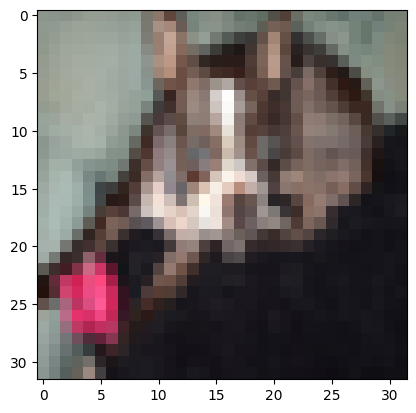

In [ ]:
plt.imshow(Train_images[450])

In [ ]:
validation_images, validation_labels = Test_images[5000:6000], Test_labels[5000:6000]
train_images, train_labels = Train_images[:5000], Train_labels[:5000]

In [ ]:
print ('train_images shape:',train_images.shape)
print ('test_images shape:',validation_images.shape)
print ('train_labels shape:',train_labels.shape)
print ('test_labels shape:',validation_labels.shape)

train_images shape: (5000, 32, 32, 3)
test_images shape: (1000, 32, 32, 3)
train_labels shape: (5000, 1)
test_labels shape: (1000, 1)


In [ ]:
def process_images(image, label):

    image = tf.image.per_image_standardization(image)

    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32).shuffle(1000)
train_dataset = train_dataset.map(lambda x,y: (tf.math.divide(tf.cast(x,tf.float32),255.0),tf.reshape(tf.one_hot(y,10),(-1,10))))

In [ ]:
train_dataset = train_dataset.map(process_images)

In [ ]:
valid_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)).batch(100).shuffle(1000)
valid_dataset = valid_dataset.map(lambda x,y: (tf.math.divide(tf.cast(x,tf.float32),255.0), tf.reshape(tf.one_hot(y,10),(-1,10))))

In [ ]:
valid_dataset = valid_dataset.map(process_images)

In [ ]:
from keras.models import load_model
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.models import Model
import os
import time

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),

    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss= 'categorical_crossentropy' , optimizer=tf.optimizers.SGD(learning_rate=0.001), metrics=[ 'accuracy' ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
model_history1 = model.fit(train_dataset, epochs=10, validation_data=valid_dataset, validation_steps=3)

Epoch 1/10
157/157 [==============================] - 769s 5s/step - loss: 2.3034 - accuracy: 0.1070 - val_loss: 2.2924 - val_accuracy: 0.1833
Epoch 2/10
157/157 [==============================] - 759s 5s/step - loss: 2.2935 - accuracy: 0.1242 - val_loss: 2.2874 - val_accuracy: 0.1467
Epoch 3/10
157/157 [==============================] - 749s 5s/step - loss: 2.2852 - accuracy: 0.1456 - val_loss: 2.2688 - val_accuracy: 0.2133
Epoch 4/10
157/157 [==============================] - 757s 5s/step - loss: 2.2758 - accuracy: 0.1452 - val_loss: 2.2566 - val_accuracy: 0.2667
Epoch 5/10
157/157 [==============================] - 764s 5s/step - loss: 2.2605 - accuracy: 0.1614 - val_loss: 2.2238 - val_accuracy: 0.2933
Epoch 6/10
157/157 [==============================] - 758s 5s/step - loss: 2.2332 - accuracy: 0.1904 - val_loss: 2.1926 - val_accuracy: 0.2767
Epoch 7/10
157/157 [==============================] - 761s 5s/step - loss: 2.1918 - accuracy: 0.2198 - val_loss: 2.1092 - val_accuracy: 0.3233

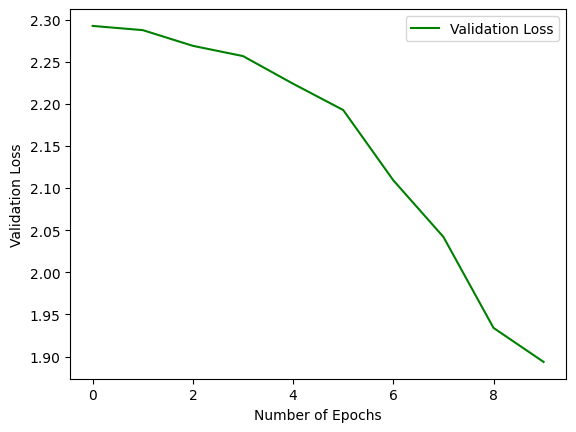

In [24]:
plt.plot(model_history1.history['val_loss'], color='green', label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

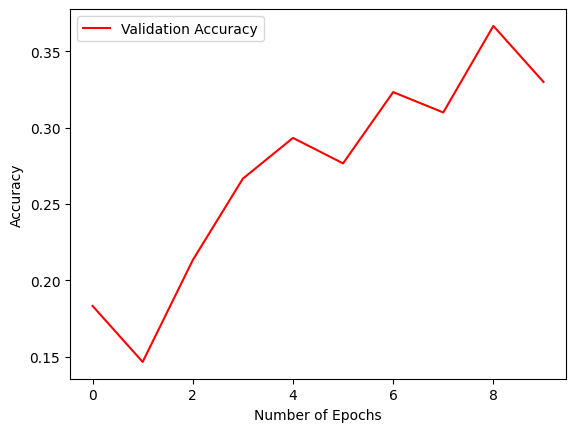

In [25]:
plt.plot(model_history1.history['val_accuracy'], color='r', label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<Axes: >

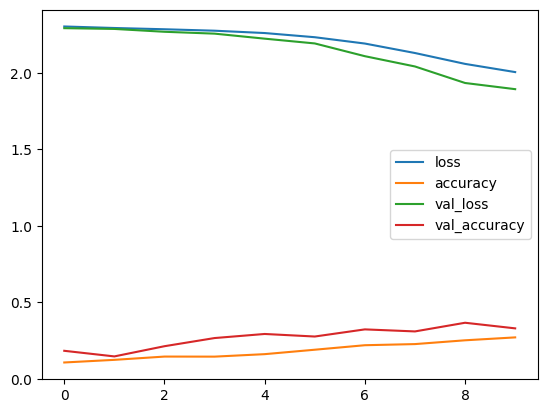

In [26]:
pd.DataFrame(model_history1.history).plot()

In [27]:
score = model.evaluate(valid_dataset)

10/10 [==============================] - 43s 4s/step - loss: 1.9337 - accuracy: 0.3320


Hence, Using AlexNet we are getting a validation accuracy of 33%

In [28]:
score

[1.9337279796600342, 0.3319999873638153]

In [29]:
y_pred = model.predict(valid_dataset)

10/10 [==============================] - 47s 5s/step


In [ ]:
import cv2

VGG-19 classifier for Cifar -10 dataset:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:
from keras.utils import to_categorical

In [ ]:
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [ ]:
x_train = resize_img(Train_images)
x_test = resize_img(Test_images)
print("New shape of x_train is ",x_train.shape)
print("New shape of x_test  is ",x_test.shape)

New shape of x_train is  (50000, 48, 48, 3)
New shape of x_test  is  (10000, 48, 48, 3)


In [ ]:
y_train = to_categorical(Train_labels,num_classes=10)
y_test = to_categorical(Test_labels,num_classes=10)

print("New shape of y_train is ",y_train.shape)
print("New shape of y_test  is ",y_test.shape)

New shape of y_train is  (50000, 10)
New shape of y_test  is  (10000, 10)


In [ ]:
vgg = VGG19(include_top=False,weights="imagenet",input_shape=(48,48,3))

vgg.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
model = Sequential()

for layer in vgg.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

In [ ]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

hist = model.fit(x_train,y_train,validation_split=0.15,epochs=10,batch_size=1000)

Epoch 1/10
43/43 [==============================] - 1745s 41s/step - loss: 8.3321 - accuracy: 0.3992 - val_loss: 4.8159 - val_accuracy: 0.4871
Epoch 2/10
43/43 [==============================] - 1746s 41s/step - loss: 4.1695 - accuracy: 0.5014 - val_loss: 4.2938 - val_accuracy: 0.4821
Epoch 3/10
43/43 [==============================] - 1705s 40s/step - loss: 3.4613 - accuracy: 0.5169 - val_loss: 3.6344 - val_accuracy: 0.4544
Epoch 4/10
43/43 [==============================] - 1704s 40s/step - loss: 3.1496 - accuracy: 0.5201 - val_loss: 3.0380 - val_accuracy: 0.5064
Epoch 5/10
43/43 [==============================] - 1703s 40s/step - loss: 2.8268 - accuracy: 0.5269 - val_loss: 3.4960 - val_accuracy: 0.5084
Epoch 6/10
43/43 [==============================] - 1708s 40s/step - loss: 2.7746 - accuracy: 0.5268 - val_loss: 3.1352 - val_accuracy: 0.4597
Epoch 7/10
43/43 [==============================] - 1703s 40s/step - loss: 2.5997 - accuracy: 0.5255 - val_loss: 3.0812 - val_accuracy: 0.5084

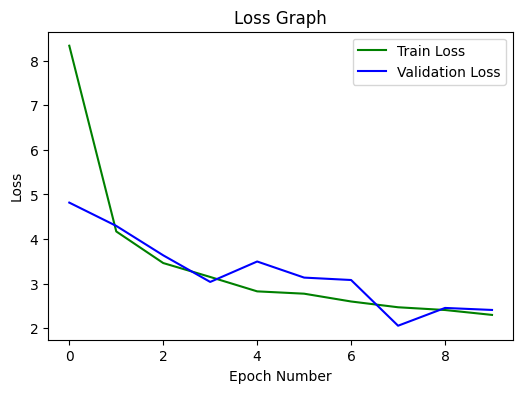

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.epoch,hist.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

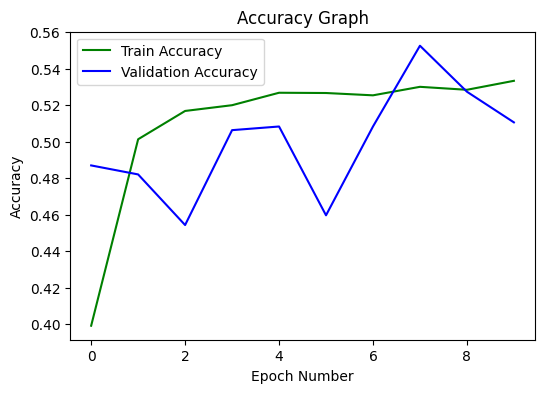

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(hist.epoch,hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

Hence, Using VGG-19, we are getting a train accuracy of 53% and a validation accuracy between 45-55%.

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 338s 1s/step - loss: 2.3611 - accuracy: 0.5152


[2.361116647720337, 0.5152000188827515]